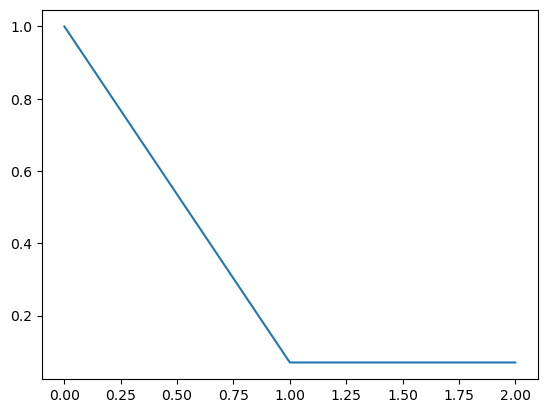

In [6]:
import torch

# 다변량 센서 데이터 생성 (가속도 데이터)
sensor_data = torch.tensor([
    [0.5, 0.3, 0.2],  # x축 가속도
    [0.7, 0.1, 0.4],  # y축 가속도
    [0.9, 0.6, 0.8]   # z축 가속도
])

# 푸리에 변환 수행
fft_result = torch.fft.fft(sensor_data, dim=1)

import matplotlib.pyplot as plt

# 주파수 도메인에서의 주파수 성분 표현
power_spectrum = torch.abs(fft_result) ** 2

# 주파수 성분 그래프 그리기
plt.plot(power_spectrum[0], label='x-axis')  # x


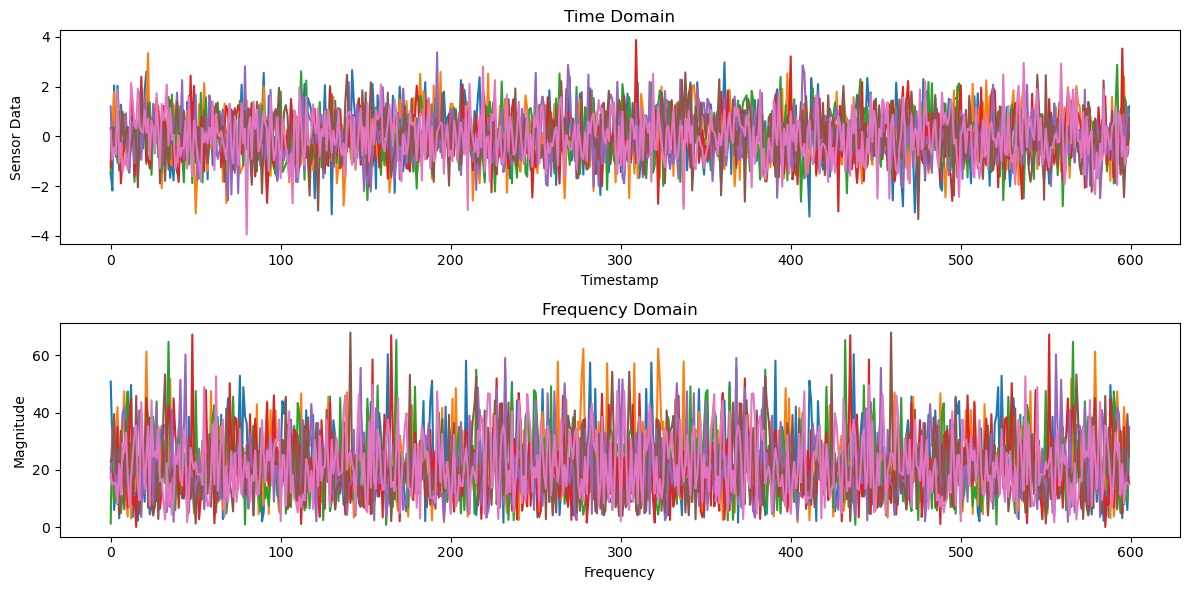

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 입력 데이터 생성
input_data = np.random.randn(600, 7)  # 600개의 타임스탬프와 7개의 멀티 센서 데이터

# 시간 도메인 데이터 시각화
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(input_data)
plt.title("Time Domain")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Data")

# 주파수 도메인 변환
freq_data = np.fft.fft(input_data, axis=0)

# 주파수 도메인 데이터 시각화
plt.subplot(2, 1, 2)
plt.plot(np.abs(freq_data))
plt.title("Frequency Domain")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()


In [2]:
from data_preprocessing.dataloader import loading_data
import argparse

parser = argparse.ArgumentParser()

parser.add_argument('--padding', type=str, 
                    default='mean', help='choose one of them : no, max, mean')
parser.add_argument('--timespan', type=int, 
                    default=1000, help='choose of the number of timespan between data points(1000 = 1sec, 60000 = 1min)')
parser.add_argument('--min_seq', type=int, 
                    default=10, help='choose of the minimum number of data points in a example')
parser.add_argument('--min_samples', type=int, default=20, 
                    help='choose of the minimum number of samples in each label')
parser.add_argument('--selected_dataset', default='opportunity', type=str,
                    help='Dataset of choice: lapras, casas, opportunity, aras_a, aras_b')
parser.add_argument('--aug_method', type=str, default='AddNoise', help='choose the data augmentation method')
parser.add_argument('--aug_wise', type=str, default='Temporal', help='choose the data augmentation wise')

parser.add_argument('--test_ratio', type=float, default=0.3, help='choose the number of test ratio')

args = parser.parse_args(args=[])

data_type = args.selected_dataset

num_classes, datalist, labellist = loading_data(data_type, args)

print(datalist.shape)

Loading Opportunity Dataset --------------------------------------
data/Opportunity/S1-ADL1.dat
data/Opportunity/S1-ADL2.dat
data/Opportunity/S1-ADL3.dat
data/Opportunity/S1-ADL4.dat
data/Opportunity/S1-ADL5.dat
data/Opportunity/S1-Drill.dat
data/Opportunity/S2-ADL1.dat
data/Opportunity/S2-ADL2.dat
data/Opportunity/S2-ADL3.dat
data/Opportunity/S2-ADL4.dat
data/Opportunity/S2-ADL5.dat
data/Opportunity/S2-Drill.dat
data/Opportunity/S3-ADL1.dat
data/Opportunity/S3-ADL2.dat
data/Opportunity/S3-ADL3.dat
data/Opportunity/S3-ADL4.dat
data/Opportunity/S3-ADL5.dat
data/Opportunity/S3-Drill.dat
data/Opportunity/S4-ADL1.dat
data/Opportunity/S4-ADL2.dat
data/Opportunity/S4-ADL3.dat
data/Opportunity/S4-ADL4.dat
data/Opportunity/S4-ADL5.dat
data/Opportunity/S4-Drill.dat
Loading Opportunity Dataset Finished--------------------------------------
types_label : [1, 3, 2, 5, 4]
count_label : [40, 20, 20, 20, 20]
sum of # episodes: 120
original label: [1, 2, 3, 4, 5] 
changed label: [1, 2, 3, 4, 5]
Augmen

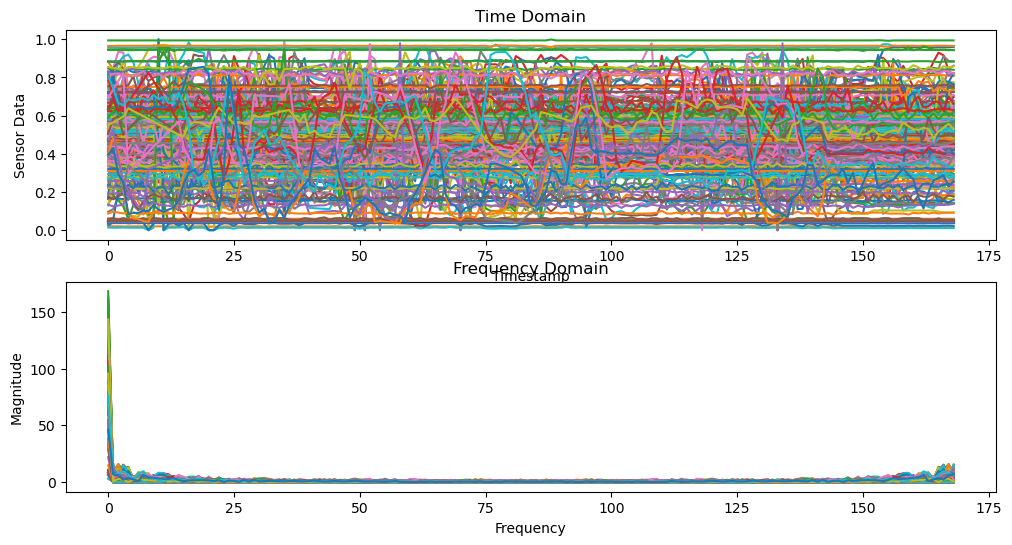

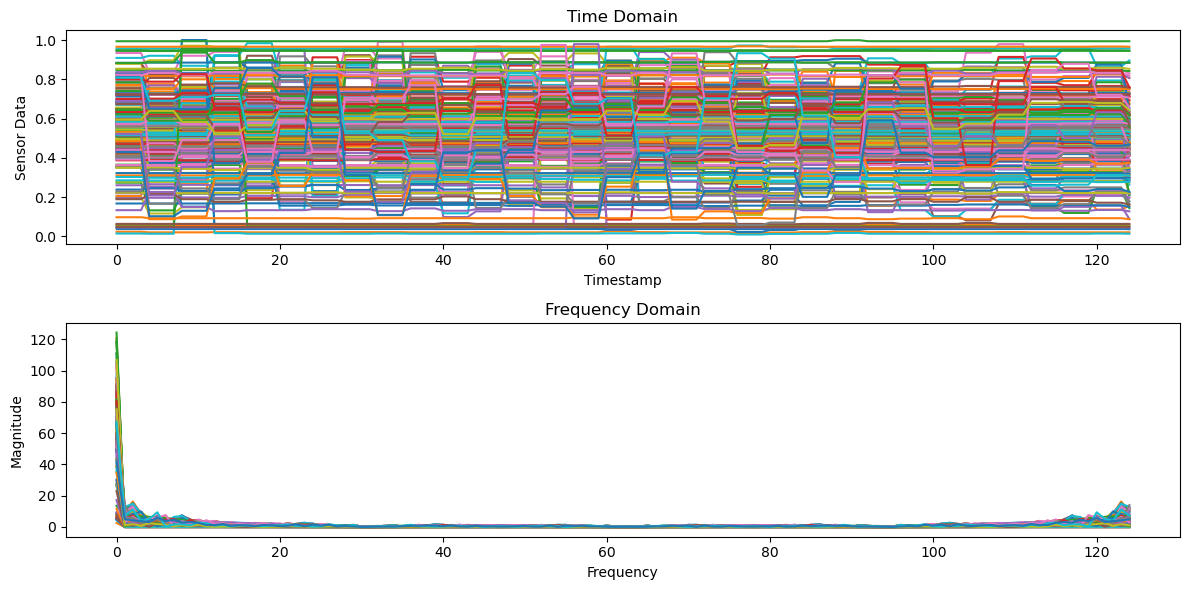

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tsaug import *

# 입력 데이터 생성
input_data = datalist[45].cpu().numpy()  # 600개의 타임스탬프와 7개의 멀티 센서 데이터

# 시간 도메인 데이터 시각화
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(input_data)
plt.title("Time Domain")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Data")

# 주파수 도메인 변환
freq_data = np.fft.fft(input_data, axis=0)

# 주파수 도메인 데이터 시각화
plt.subplot(2, 1, 2)
plt.plot(np.abs(freq_data))
plt.title("Frequency Domain")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")


# Augmentation
# 
#my_aug =  Pool(kind='max',size=4)
a_data = input_data[ :125, :]
#my_aug = (Dropout(p=0.1,fill=0)) 
#my_aug = (AddNoise(scale=0.1))
my_aug =  Pool(kind='max',size=4)
aug = my_aug.augment(np.reshape(a_data,(1, a_data.shape[0], -1)))
#modified_data = np.concatenate((aug[0], input_data[126:, :]), axis=0)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(aug[0])
plt.title("Time Domain")
plt.xlabel("Timestamp")
plt.ylabel("Sensor Data")


# 주파수 도메인 변환
freq_data = np.fft.fft(aug[0], axis=0)

# 주파수 도메인 데이터 시각화
plt.subplot(2, 1, 2)
plt.plot(np.abs(freq_data))
plt.title("Frequency Domain")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")


plt.tight_layout()
plt.show()
